In [1]:
from cyclum import models

Using TensorFlow backend.


In [2]:
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error as mse

import numpy as np
import matplotlib.pyplot as plt

In [3]:
import pickle as pkl

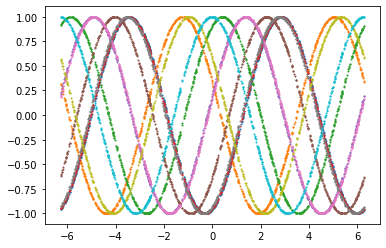

In [4]:
seed = 3
np.random.seed(seed)

cell_time = np.random.uniform(-2 * np.pi, 2 * np.pi, [1000, 1])

gene01_phase = np.random.uniform(0, 2 * np.pi, [1, 500])
gene01_time = np.random.normal(0, 0.1, [1, 500])
gene01_speed = np.random.uniform(0.5, 1.5, [1, 500])

gene0_phase = np.random.uniform(0, 2 * np.pi, [1, 800])

gene1_time = np.random.normal(0, 0.1, [1, 500])
gene1_speed = np.random.uniform(0.5, 1.5, [1, 500])

gene0 = np.sin(cell_time - gene0_phase)
gene1 = np.tanh(gene1_speed * (cell_time - gene1_time))
gene01 = np.sin(cell_time - gene01_phase) + np.tanh(gene01_speed * (cell_time - gene01_time))

for i in range(10):
    plt.scatter(x=cell_time, y=gene0[:, i], s=1)

In [5]:
gene = np.hstack([gene0])





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


epoch: 100/1000, loss:  0.2018, total train time:  12.90s
epoch: 200/1000, loss:  0.1044, total train time:  23.90s
epoch: 300/1000, loss:  0.0992, total train time:  35.07s
epoch: 400/1000, loss:  0.1046, total train time:  46.32s
epoch: 500/1000, loss:  0.0961, total train time:  57.73s
epoch: 600/1000, loss:  0.0945, total train time:  69.13s
epoch: 700/1000, loss:  0.0975, total train time:  80.47s
epoch: 800/1000, loss:  0.0955, total train time:  91.75s
epoch: 900/1000, loss:  0.0962, total train time:  102.78s
epoch: 1000/1000, loss:  0.0952, total train time:  114.10s
epoch: 100/1000, loss:  0.0359, total train time:  12.59s
epoch: 200/1000, loss:  0.0311, total train time:  24.92s
epoch: 300/1000, loss:  0.0302, total train time:  37.35s
epoch: 400/1000, loss:  0.0297, total train time:  49.67s
epoch: 500/1000, loss:  0.0296, total train time:  61.85s
epoch:

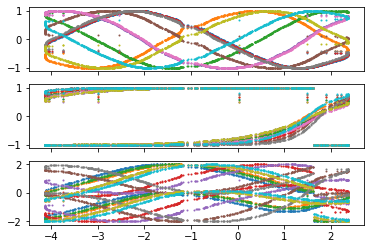

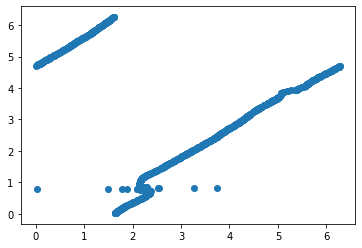

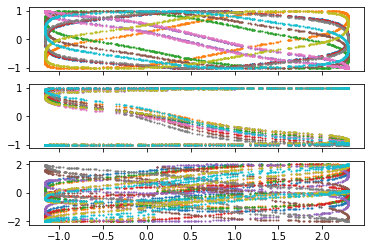

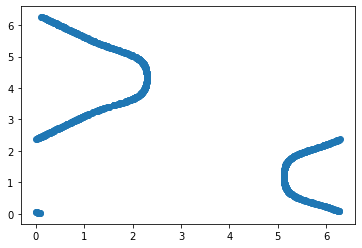

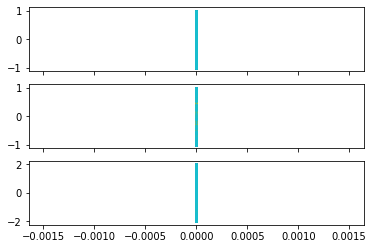

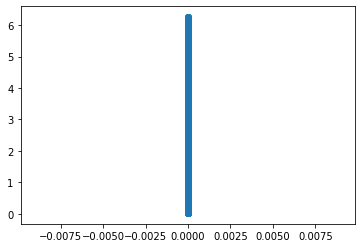

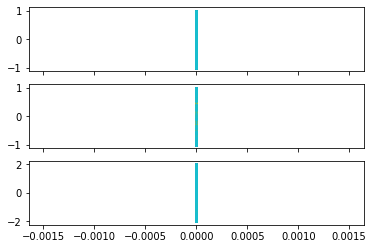

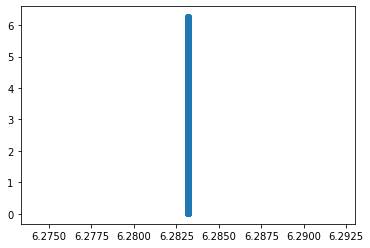

In [6]:
ae_loss = []
for i in range(4):
    model = models.AutoEncoder(input_width=gene.shape[1], 
                           encoder_depth=2, 
                           encoder_width=50, 
                           n_circular_unit=1,
                           n_logistic_unit=0,
                           n_linear_unit=0,
                           n_linear_bypass=i,
                           dropout_rate=0.1,
                           nonlinear_reg=1e-4)

    history = model.train(gene, epochs=1000, verbose=100, rate=2e-4)

    pseudotime = model.predict_pseudotime(gene)
    
    fig, ax = plt.subplots(3, 1, sharex=True)
    
    for i in range(10):
        ax[0].scatter(x=pseudotime[0], y=gene0[:, i], s=1)
    
    for i in range(10):
        ax[1].scatter(x=pseudotime[0], y=gene1[:, i], s=1)
    
    for i in range(10):
        ax[2].scatter(x=pseudotime[0], y=gene01[:, i], s=1)

    plt.figure()
    plt.scatter(pseudotime[0] % (2 * np.pi), cell_time % (2 * np.pi))

    ae_loss.append(history.history['loss'][-1])

In [7]:
pca_model = PCA(n_components=5)
pca_load = pca_model.fit_transform(gene)
pca_comp = pca_model.components_

print(pca_load.shape)
print(pca_comp.shape)

(1000, 5)
(5, 800)


## Choose best number of the linear components

In [1]:
pca_loss = [mse(gene, pca_load[:, 0:(i+1)] @ pca_comp[0:(i+1), :]) for i in range(5)]
plt.scatter([0, 1, 2, 3, 4], pca_loss)
plt.scatter([0, 1, 2, 3], ae_loss)
plt.legend(['PCA', 'AE'])

plt.plot([0, 1, 2, 3, 4], pca_loss)
plt.plot([0, 1, 2, 3], ae_loss)

plt.xticks([0, 1, 2, 3, 4])

NameError: name 'mse' is not defined